In [1]:
import datasets
import numpy as np

ds_all = {
    '5e5': 'Asap7772/aime_2025_responses_openthoughts-sft-qwen3-1.7b-lr5e5',
    '1e5': 'Asap7772/aime_2025_responses_openthoughts-sft-qwen3-1.7b-lr1e5',
    '5e6': 'Asap7772/aime_2025_responses_openthoughts-sft-qwen3-1.7b-lr5e6',
    '1e6': 'Asap7772/aime_2025_responses_openthoughts-sft-qwen3-1.7b-lr1e6',
    '5e7': 'Asap7772/aime_2025_responses_openthoughts-sft-qwen3-1.7b-lr5e7',
    '1e7': 'Asap7772/aime_2025_responses_openthoughts-sft-qwen3-1.7b-lr1e7',
}

ds_all = {k: datasets.load_dataset(v, split='train') for k, v in ds_all.items()}
succ_rate_all = {k: np.mean(ds_all[k]['success_rate']).item() * 100 for k in ds_all.keys()}
succ_rate_all

{'5e5': 12.083333333333334,
 '1e5': 7.083333333333333,
 '5e6': 7.5,
 '1e6': 3.3333333333333335,
 '5e7': 4.166666666666666,
 '1e7': 0.8333333333333334}

/tmp/ipykernel_2688822/4009096620.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


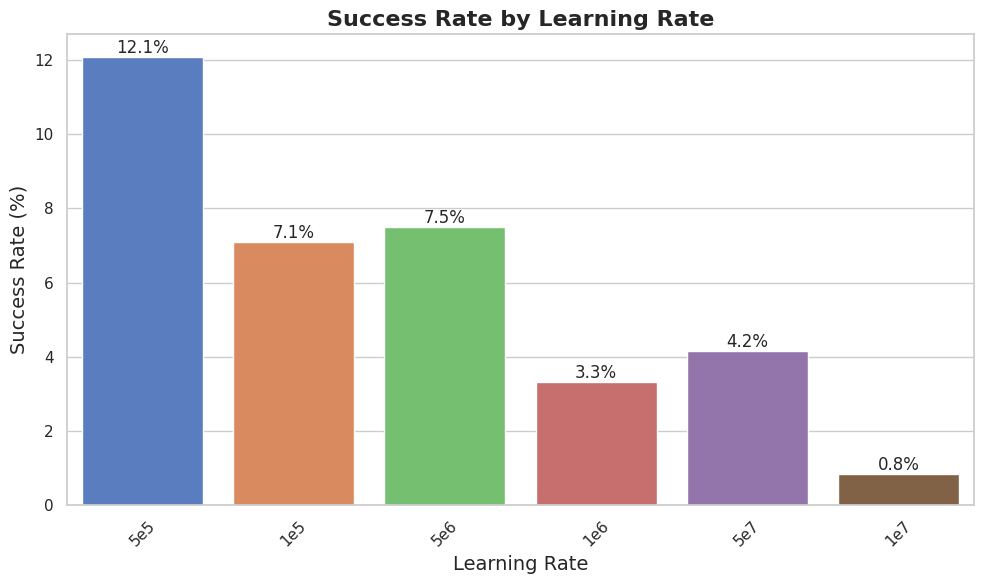

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean theme
sns.set_theme(style="whitegrid")

# Create the figure
plt.figure(figsize=(10, 6))

# Bar plot
ax = sns.barplot(
    x=list(succ_rate_all.keys()),
    y=list(succ_rate_all.values()),
    palette="muted"
)

# Improve labels and aesthetics
ax.set_title("Success Rate by Learning Rate", fontsize=16, fontweight='bold')
ax.set_xlabel("Learning Rate", fontsize=14)
ax.set_ylabel("Success Rate (%)", fontsize=14)
ax.tick_params(axis='x', rotation=45)
# ax.set_ylim(0, 100)  # Assuming percentage

# Add value labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()